# Capstone Project - Car Accident Severity

## Table of contents
* [Introduction](#introduction)
* [Data Understanding and Preparation](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

When it comes to car accidents, there can be a variety of external factors that contribute and lead to the causes. As one can imagine, road intersections might be the hot spots where accidents happen. Also, accidents may happen more frequently during a raining day due to lack of vision. A combination of such external factors may lead to road accidents with different severity. It is of high interest to predict severity of road accidents based on the readily observable and attainable data of external conditions, so that first responders are aware of the type of accidents they are dealing with.

In this study, we will examine across a large amount of car accidents with the power of data science, and correlate the severity of the accidents with their attributes, such as locations, road conditions, weather, and etc. 

## Data Understanding and Preparation <a name="data"></a>

### Data Sources

In this study, we will use the dataset provided by the course of Applied Data Science Capstone project. This data set contains nearly 200000 cases of car accidents, which is sufficient for our study. 

### Data Selection and Cleaning

This dataset has a few problems and need cleaning.

#### Duplicate Columns

The target variable that we try to predict in this study is the severity code. This variable has two values, 1 and 2, whereas a value of 1 suggests property damage only, and a value of 2 indicates injury is involved. A glance at this dataset shows that there are two columns that contain data of this variable. Thus, we start by dropping one of the columns.

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

The above list shows the column names of the data set. Notice that there are two variables 'SEVERITYCODE' and 'SEVERITYCODE.1'. These two variables are duplicates. Here we drop 'SEVERITYCODE.1'.

In [5]:
df.drop('SEVERITYCODE.1',axis=1,inplace=True)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

####  Feature Selection

This vast dataset contains information that is clearly not related to the cause of a road accident, such as OBJECTID, INCKEY, and etc. Here we only keep meaningful data that potentially have an impact on the cause of a road accidents, which include the following: 
* Location of the accident: 'X', 'Y'
* Is the location a intersection or a block: 'ADDRTYPE'
* Weather condition: 'WEATHER'
* Under influence of achohol: 'UNDERINFL'
* Road Condition: 'ROADCOND'
* Light Condition: 'LIGHTCOND'
* Speeding or not: 'SPEEDING'


In [7]:
df = df[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]

In [8]:
df.head(15)

,SEVERITYCODE,X,Y,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,0,Raining,Wet,Daylight,NaN
5,1,-122.387598,47.690575,Intersection,N,Clear,Dry,Daylight,NaN
6,1,-122.338485,47.618534,Intersection,0,Raining,Wet,Daylight,NaN
7,2,-122.320780,47.614076,Intersection,N,Clear,Dry,Daylight,NaN
8,1,-122.335930,47.611904,Block,0,Clear,Dry,Daylight,NaN
9,2,-122.384700,47.528475,Intersection,0,Clear,Dry,Daylight,NaN


#### Missing Values

Notice that the above dataset contains many values of NaN. These values need to be dealt with in different ways. 

* The location data 'X' and 'Y' have a few rows of missing data. In this case, the entire rows are dropped. The same approach is applied to the other features where the number of NaN values contributes to only a small portion of the whole columns. 
* An exception is the data contained in 'SPEEDING'. Due to the data format contained in the raw spreadsheet, only a speeding case has an entry 'Y', the rest are missing values. In this case we replace the NaN values with 0.

In [9]:
df['SPEEDING'].fillna(value=0,axis=0,inplace=True)
df.dropna(inplace=True)
df.head(15)

,SEVERITYCODE,X,Y,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,N,Overcast,Wet,Daylight,0
1,1,-122.347294,47.647172,Block,0,Raining,Wet,Dark - Street Lights On,0
2,1,-122.334540,47.607871,Block,0,Overcast,Dry,Daylight,0
3,1,-122.334803,47.604803,Block,N,Clear,Dry,Daylight,0
4,2,-122.306426,47.545739,Intersection,0,Raining,Wet,Daylight,0
5,1,-122.387598,47.690575,Intersection,N,Clear,Dry,Daylight,0
6,1,-122.338485,47.618534,Intersection,0,Raining,Wet,Daylight,0
7,2,-122.320780,47.614076,Intersection,N,Clear,Dry,Daylight,0
8,1,-122.335930,47.611904,Block,0,Clear,Dry,Daylight,0
9,2,-122.384700,47.528475,Intersection,0,Clear,Dry,Daylight,0


#### Data Formatting and Filtering

In [10]:
df.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
dtype: object

Many features in the above dataset has string values. To prepare this dataset for the downstream analysis, we need to replace the categorical values with quantitative values. Here we use one-shot binning to convert categorical data into a number of indicator columns. For example, the 'ROADCOND' column is converted into 9 separate columns - 'Dry', 'Ice', and etc, each indicating whether an accident happened under such road conditions, as shown below. 

In [11]:
df_wea=pd.get_dummies(df['ROADCOND'])
df_wea.head()

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


A further investigation shows that 'Dry' and 'Wet' conditions contribute to 91% of the total number of cases. To simplify the dataset, we only keep 'Dry' and 'Wet' columns, and drop the rest.

In [12]:
df['ROADCOND'].value_counts()

Dry               121871
Wet                46009
Unknown            13795
Ice                 1174
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64

In [13]:
df_wea=df_wea[['Dry','Wet']]
df_wea.head()

,Dry,Wet
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


The two columns are concatenated with the dataset, and the original column 'ROADCOND' is dropped.

In [14]:
df_wea.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df_wea],axis=1)


In [15]:
df.drop(['ROADCOND'],axis=1,inplace=True)

In [16]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING,Dry,Wet
0,2,-122.323148,47.703140,Intersection,N,Overcast,Daylight,0,0,1
1,1,-122.347294,47.647172,Block,0,Raining,Dark - Street Lights On,0,0,1
2,1,-122.334540,47.607871,Block,0,Overcast,Daylight,0,1,0
3,1,-122.334803,47.604803,Block,N,Clear,Daylight,0,1,0
4,2,-122.306426,47.545739,Intersection,0,Raining,Daylight,0,0,1


The above approach is also applied to columns 'ADDRTYPE', 'WEATHER', and 'LIGHTCOND'. 

In [17]:
df_add=pd.get_dummies(df['ADDRTYPE'])
df_add.head()

,Block,Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
df_add.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df_add],axis=1)

In [19]:
df.drop(['ADDRTYPE'],axis=1,inplace=True)
df.head()


,SEVERITYCODE,X,Y,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING,Dry,Wet,Block,Intersection
0,2,-122.323148,47.703140,N,Overcast,Daylight,0,0,1,0,1
1,1,-122.347294,47.647172,0,Raining,Dark - Street Lights On,0,0,1,1,0
2,1,-122.334540,47.607871,0,Overcast,Daylight,0,1,0,1,0
3,1,-122.334803,47.604803,N,Clear,Daylight,0,1,0,1,0
4,2,-122.306426,47.545739,0,Raining,Daylight,0,0,1,0,1


In [20]:
df_wea=pd.get_dummies(df['WEATHER'])
df['WEATHER'].value_counts()

Clear                       108833
Raining                      31987
Overcast                     27105
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [21]:
df_wea=df_wea[['Clear','Raining','Overcast']]

In [22]:
df_wea.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df_wea],axis=1)

In [23]:
df.drop(['WEATHER'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,LIGHTCOND,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast
0,2,-122.323148,47.703140,N,Daylight,0,0,1,0,1,0,0,1
1,1,-122.347294,47.647172,0,Dark - Street Lights On,0,0,1,1,0,0,1,0
2,1,-122.334540,47.607871,0,Daylight,0,1,0,1,0,0,0,1
3,1,-122.334803,47.604803,N,Daylight,0,1,0,1,0,1,0,0
4,2,-122.306426,47.545739,0,Daylight,0,0,1,0,1,0,1,0


In [24]:
df_wea=pd.get_dummies(df['LIGHTCOND'])
df['LIGHTCOND'].value_counts()

Daylight                    113522
Dark - Street Lights On      47250
Unknown                      12416
Dusk                          5763
Dawn                          2422
Dark - No Street Lights       1450
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [25]:
df_wea=df_wea[['Daylight','Dark - Street Lights On']]
df_wea.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df_wea],axis=1)
df.drop(['LIGHTCOND'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,-122.323148,47.703140,N,0,0,1,0,1,0,0,1,1,0
1,1,-122.347294,47.647172,0,0,0,1,1,0,0,1,0,0,1
2,1,-122.334540,47.607871,0,0,1,0,1,0,0,0,1,1,0
3,1,-122.334803,47.604803,N,0,1,0,1,0,1,0,0,1,0
4,2,-122.306426,47.545739,0,0,0,1,0,1,0,1,0,1,0


The column 'UNDERINFL' contains mixed values of Y, 0, and N. Both N and 0 indicate the driver is not influenced by achohol. Here we convert values of N to integer 0, and Y to integer 1. We apply the same approach to column 'SPEEDING'

In [26]:
df['UNDERINFL'].replace(to_replace='N',value=0,inplace=True)
df['UNDERINFL'].replace(to_replace='Y',value=1,inplace=True)


In [27]:
df['SPEEDING'].replace(to_replace='Y',value=1,inplace=True)


And finally, upon checking the data types of each column, we notice that column 'UNDERINFL' have a type of 'object'. We need to cast these two variables into integers for further analysis.

In [28]:
df['UNDERINFL'].value_counts()

0    97244
0    78064
1     4980
1     3879
Name: UNDERINFL, dtype: int64

In [29]:
df['UNDERINFL'].replace(to_replace='1',value=1,inplace=True)
df['UNDERINFL'].replace(to_replace='0',value=0,inplace=True)

In [30]:
df.dtypes

SEVERITYCODE                 int64
X                          float64
Y                          float64
UNDERINFL                    int64
SPEEDING                     int64
Dry                          uint8
Wet                          uint8
Block                        uint8
Intersection                 uint8
Clear                        uint8
Raining                      uint8
Overcast                     uint8
Daylight                     uint8
Dark - Street Lights On      uint8
dtype: object

In [31]:
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,-122.323148,47.703140,0,0,0,1,0,1,0,0,1,1,0
1,1,-122.347294,47.647172,0,0,0,1,1,0,0,1,0,0,1
2,1,-122.334540,47.607871,0,0,1,0,1,0,0,0,1,1,0
3,1,-122.334803,47.604803,0,0,1,0,1,0,1,0,0,1,0
4,2,-122.306426,47.545739,0,0,0,1,0,1,0,1,0,1,0


#### Data Normalization

The location parameters 'X' and 'Y' are clustered around -122 and 47, with small deviations. In order to facilitate further analysis, data normalization is necessary. Here we use z-score normalization. 

In [32]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit(df[['X','Y']])
df[['X','Y']]=SC.transform(df[['X','Y']])


In [33]:
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,0.244968,1.487084,0,0,0,1,0,1,0,0,1,1,0
1,1,-0.559422,0.491474,0,0,0,1,1,0,0,1,0,0,1
2,1,-0.134529,-0.207651,0,0,1,0,1,0,0,0,1,1,0
3,1,-0.143300,-0.262238,0,0,1,0,1,0,1,0,0,1,0
4,2,0.802044,-1.312915,0,0,0,1,0,1,0,1,0,1,0


The above dataset is now cleaned, formated, and filtered for modeling and downstream analysis.

## Exploratory Data Analysis

#### Relationship between Accident Locations and Accident Severity

Certain locations can have higher rate of accidents, such as two-lane roads, parking lots and etc. In this session, we examine the relation between coordinates of accident location and accident severity. The scatter plot below shows that accidents of severity 1 and 2 nearly covers the same area. In this case, accident locations hardly play a role. 

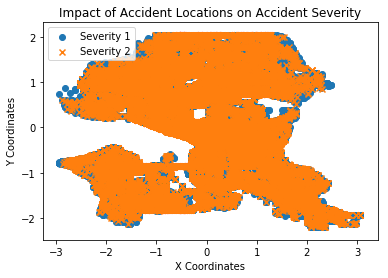

In [36]:

import matplotlib.pyplot as plt

Inf1= list(df['X'])
Inf1= list(df['Y'])
Sev1= list(df['SEVERITYCODE'])
df_0 = df[df['SEVERITYCODE']==1]
df_0=df_0[['X','Y','SEVERITYCODE']]
df_1 = df[df['SEVERITYCODE']==2]
df_1=df_1[['X','Y','SEVERITYCODE']]

plt.scatter(df_0['X'], df_0['Y'], marker='o');
plt.scatter(df_1['X'], df_1['Y'], marker='x');
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Impact of Accident Locations on Accident Severity')
#plt.xticks(ticks=N,labels=['No Alcohol','Alcohol'])
plt.legend(['Severity 1', 'Severity 2'])

plt.show()

#### Relationship between Influence of Alcohol and Accident Severity 


It is commonly know that druck driving contribute significantly to road accidents. In this dataset, the majority of accidents does not involve drunk driving. Comparing number of accidents directly can be misleading. In this comparison, numbers of accidents of severity 1 and 2 are converted into percentage values for each of the two categories: drunk driving and not drunk driving, as shown in the plot below. It is observed that under the influence of alcohol, percentage of accidents of severity 2 increases by 9.2%, indicating our hypothesis is correct.   

In [37]:

ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
Inf1= list(df['UNDERINFL'])
Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['UNDERINFL'])):
    if Inf1[ind]==0 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==0 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf1[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1


In [38]:
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)

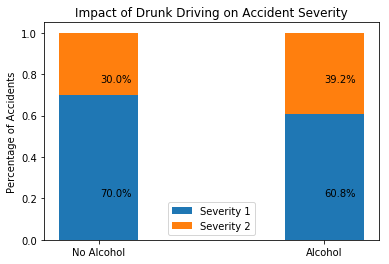

In [39]:


N = [0,1]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2], width, bottom=[Per0_1,Per1_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Drunk Driving on Accident Severity')
plt.xticks(ticks=N,labels=['No Alcohol','Alcohol'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[0.006,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[0.006,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[1,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[1,0.2],va='bottom',ha='left')
plt.show()

#### Relationship between Speeding and Accident Severity 

Similar to the influence of alcohol, the hypothesis in this case is that speeding contribute to the increase of accident severity. We apply the same approach used in the previous session, and the comparison is shown below. It is observed that speeding results in an increase percentage of accidents of severity 2 by 8.1%, indicating our hypotheses is correct.   

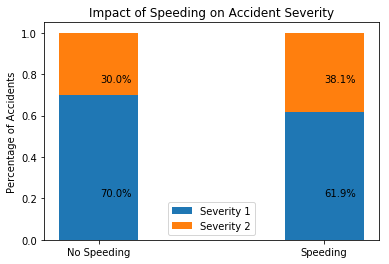

In [40]:
ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
Inf1= list(df['SPEEDING'])
Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['SPEEDING'])):
    if Inf1[ind]==0 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==0 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf1[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)

N = [0,1]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2], width, bottom=[Per0_1,Per1_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Speeding on Accident Severity')
plt.xticks(ticks=N,labels=['No Speeding','Speeding'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[0.006,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[0.006,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[1,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[1,0.2],va='bottom',ha='left')
plt.show()

#### Relationship between Road Conditions and Accident Severity 

The hypothesis we use in this case is that wet road condition causes slippery road, which leads to higher occurrence of accidents. We apply the same visualization approach used in the previous session, and the comparison is shown below. The plot indicates that the percentage of accident severity does not differ much under dry or wet road conditions. Thus the hypothesis is incorrect.

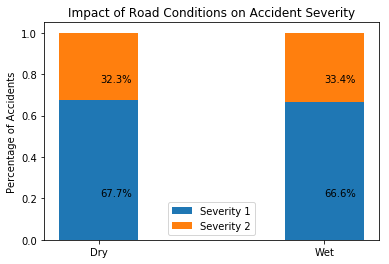

In [41]:
ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
Inf1= list(df['Dry'])
Inf2= list(df['Wet'])
Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['SPEEDING'])):
    if Inf1[ind]==1 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf2[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf2[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)

N = [0,1]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2], width, bottom=[Per0_1,Per1_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Road Conditions on Accident Severity')
plt.xticks(ticks=N,labels=['Dry','Wet'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[0.006,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[0.006,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[1,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[1,0.2],va='bottom',ha='left')
plt.show()

#### Relationship between Types of Accident Locations and Accident Severity 

In [42]:
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,0.244968,1.487084,0,0,0,1,0,1,0,0,1,1,0
1,1,-0.559422,0.491474,0,0,0,1,1,0,0,1,0,0,1
2,1,-0.134529,-0.207651,0,0,1,0,1,0,0,0,1,1,0
3,1,-0.143300,-0.262238,0,0,1,0,1,0,1,0,0,1,0
4,2,0.802044,-1.312915,0,0,0,1,0,1,0,1,0,1,0


Preliminary investigation reveals that most accidents occur at a block or at an intersection. The hypothesis is that an intersection has higher accident severity as cars are coming from different directions, and passengers can be hit and injured from the side. The plot below shows our hypothesis is correct. Accidents of severity 2 occurred at an intersection is higher than those happened at a block, by 19.5%.

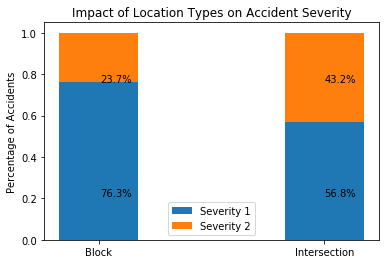

In [43]:
ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
Inf1= list(df['Block'])
Inf2= list(df['Intersection'])
Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['Intersection'])):
    if Inf1[ind]==1 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf2[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf2[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)

N = [0,1]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2], width, bottom=[Per0_1,Per1_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Location Types on Accident Severity')
plt.xticks(ticks=N,labels=['Block','Intersection'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[0.006,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[0.006,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[1,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[1,0.2],va='bottom',ha='left')
plt.show()

#### Relationship between Weather Conditions and Accident Severity 

The hypothesis is that a raining day or a clear day can cause a driver to have lower visions due to rain and sunshine, respectively. However, the plot below shows our hypothesis is incorrect. Similar percentage of accident severity is observed for all three weather conditions.

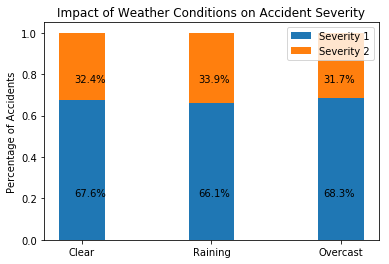

In [44]:
ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
ind2_1=0
ind2_2=0
Inf1= list(df['Clear'])
Inf2= list(df['Raining'])
Inf3= list(df['Overcast'])

Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['Overcast'])):
    if Inf1[ind]==1 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf2[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf2[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1
    elif Inf3[ind]==1 and Sev1[ind]==1:
        ind2_1=ind2_1+1
    elif Inf3[ind]==1 and Sev1[ind]==2:
        ind2_2=ind2_2+1
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)
Per2_1 = ind2_1/(ind2_1+ind2_2)
Per2_2 = ind2_2/(ind2_1+ind2_2)

N = [0,1,2]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1,Per2_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2,Per2_2], width, bottom=[Per0_1,Per1_1,Per2_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Weather Conditions on Accident Severity')
plt.xticks(ticks=N,labels=['Clear','Raining','Overcast'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[-0.06,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[-0.06,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[0.9,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[0.9,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per2_2)),xy=[1.86,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per2_1)),xy=[1.86,0.2],va='bottom',ha='left')
plt.show()

In [45]:
df.head()

,SEVERITYCODE,X,Y,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,0.244968,1.487084,0,0,0,1,0,1,0,0,1,1,0
1,1,-0.559422,0.491474,0,0,0,1,1,0,0,1,0,0,1
2,1,-0.134529,-0.207651,0,0,1,0,1,0,0,0,1,1,0
3,1,-0.143300,-0.262238,0,0,1,0,1,0,1,0,0,1,0
4,2,0.802044,-1.312915,0,0,0,1,0,1,0,1,0,1,0


#### Relationship between Light Conditions and Accident Severity 

The common knowledge and hypothesis is that driving during a night lead to higher occurence and severity of accidents. On the contrary, the plot below shows our hypothesis is incorrect. Similar percentage of accident severity is observed for both light conditions.

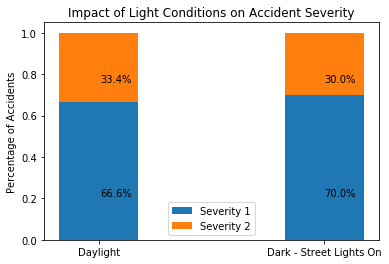

In [46]:
ind0_1=0
ind0_2=0
ind1_1=0
ind1_2=0
Inf1= list(df['Daylight'])
Inf2= list(df['Dark - Street Lights On'])
Sev1= list(df['SEVERITYCODE'])
for ind in range(len(df['Intersection'])):
    if Inf1[ind]==1 and Sev1[ind]==1:
        ind0_1=ind0_1+1
    elif Inf1[ind]==1 and Sev1[ind]==2:
        ind0_2=ind0_2+1
    elif Inf2[ind]==1 and Sev1[ind]==1:
        ind1_1=ind1_1+1
    elif Inf2[ind]==1 and Sev1[ind]==2:
        ind1_2=ind1_2+1
Per0_1 = ind0_1/(ind0_1+ind0_2)
Per0_2 = ind0_2/(ind0_1+ind0_2)
Per1_1 = ind1_1/(ind1_1+ind1_2)
Per1_2 = ind1_2/(ind1_1+ind1_2)

N = [0,1]

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(N, [Per0_1,Per1_1], width)
p2 = plt.bar(N, [Per0_2,Per1_2], width, bottom=[Per0_1,Per1_1])

plt.ylabel('Percentage of Accidents')
plt.title('Impact of Light Conditions on Accident Severity')
plt.xticks(ticks=N,labels=['Daylight','Dark - Street Lights On'])
plt.legend((p1[0], p2[0]), ('Severity 1', 'Severity 2'))

plt.annotate(str("{:.1%}".format(Per0_2)),xy=[0.006,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per0_1)),xy=[0.006,0.2],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_2)),xy=[1,0.75],va='bottom',ha='left')
plt.annotate(str("{:.1%}".format(Per1_1)),xy=[1,0.2],va='bottom',ha='left')
plt.show()

## Modeling

In this section, we will explore three different machine learning techniques that are suitable for predict categorical target values (i.e. classification problem), namely K-Nearest Neighbours (KNN), decision tree, and logistic regression. A cluster of 50 neighbors is used for the KNN method. A decision tree is built with the maximum entropy gain criterion, and a maximum depth of 4. As for the logistic regression model, a regularization parameter of 6 and the 'liblinear' solver is used.

As observed in the previous section, location coordinates, light conditions, weather conditions, and road conditions have insiginificant effect on accident severity, and are thus excluded for the modeling process. Data retained for modeling are shown below.

Note that the dataset has been balanced prior to be fed into our models.

In [47]:
#df.drop(labels=['Dry','Wet','Daylight','Dark - Street Lights On','Clear','Raining','Overcast'],axis=1,inplace=True)
df.drop(labels=['X','Y'],axis=1,inplace=True)
df.head()


,SEVERITYCODE,UNDERINFL,SPEEDING,Dry,Wet,Block,Intersection,Clear,Raining,Overcast,Daylight,Dark - Street Lights On
0,2,0,0,0,1,0,1,0,0,1,1,0
1,1,0,0,0,1,1,0,0,1,0,0,1
2,1,0,0,1,0,1,0,0,0,1,1,0
3,1,0,0,1,0,1,0,1,0,0,1,0
4,2,0,0,0,1,0,1,0,1,0,1,0


In [114]:
df_majority = df[df['SEVERITYCODE']==1]
df_minority = df[df['SEVERITYCODE']==2]

from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=56013,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['SEVERITYCODE'].value_counts()
df=df_downsampled

In [132]:
X = np.asarray(df[['UNDERINFL','SPEEDING','Block','Intersection']])
#X[0:5]
y = np.asarray(df['SEVERITYCODE'])



The dataset is split into training set and test set. Here we use 30% of our data for testing and the rest 70% for training. Predicted results are evaluated using metrics of Jaccard similarity score and f1 score. 

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=4)

In [134]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
y_hat = tree1.predict(x_test)

In [136]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.60      0.66      0.62     16746
           2       0.62      0.56      0.59     16862

   micro avg       0.61      0.61      0.61     33608
   macro avg       0.61      0.61      0.61     33608
weighted avg       0.61      0.61      0.61     33608



In [137]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,y_hat,labels=[1,2])

In [138]:
cnf

array([[10992,  5754],
       [ 7452,  9410]])

In [139]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,y_hat)

0.6070578433706261

In [140]:
from sklearn.metrics import f1_score
f1_score(y_test,y_hat)

0.6247229326513214

In [141]:
from sklearn.neighbors import KNeighborsClassifier
k=50
KNN1 = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
y_hat_K = KNN1.predict(x_test)

In [142]:
cnf=confusion_matrix(y_test,y_hat_K,labels=[1,2])

In [143]:
cnf

array([[11490,  5256],
       [ 8048,  8814]])

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_K))

              precision    recall  f1-score   support

           1       0.59      0.69      0.63     16746
           2       0.63      0.52      0.57     16862

   micro avg       0.60      0.60      0.60     33608
   macro avg       0.61      0.60      0.60     33608
weighted avg       0.61      0.60      0.60     33608



In [145]:
jaccard_similarity_score(y_test,y_hat_K)

0.6041418709830992

In [146]:
f1_score(y_test,y_hat_K)

0.6333370080476244

In [147]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=6,solver='liblinear').fit(x_train,y_train)
y_hat_LR = LR.predict(x_test)

In [148]:
print(classification_report(y_test,y_hat_LR))

              precision    recall  f1-score   support

           1       0.60      0.66      0.62     16746
           2       0.62      0.56      0.59     16862

   micro avg       0.61      0.61      0.61     33608
   macro avg       0.61      0.61      0.61     33608
weighted avg       0.61      0.61      0.61     33608



In [149]:
cnf=confusion_matrix(y_test,y_hat_LR,labels=[1,2])
cnf

array([[10992,  5754],
       [ 7452,  9410]])

In [150]:
jaccard_similarity_score(y_test,y_hat_LR)

0.6070578433706261

In [151]:
f1_score(y_test,y_hat_LR)

0.6247229326513214

## Results and Discussion

A comparison of the prediction by KNN, decision tree, and logistic regression, evaluated by Jaccard similarity score and f1 score, is shown below. 

|      | Jaccard | f1     |
|------|------|------|
|   KNN  | 0.604| 0.633|
|Decision Tree|0.607|0.624|
|Logistic Regression|0.607|0.624|

It seems that the performance of all three models are on a similar level. Even with the model parameters tuned, the highest score is still around 0.6. A closer look at the confusion matrix shows a high number of false positive and true negative cases (7452 and 5754). These numbers are on the same level of true positive and false negative cases (10992 and 9410). This suggests that we need to include more impactful features to properly categorize these cases.

## Conclusion

In this study, we examined the dataset that contains potential causes that contribute to severity of road accidents. The dataset contains duplicate columns, missing values, and irrelevant information, and has been cleaned, formatted, and filtered prior to the analysis stage.

Exploatory analysis reveals relationship between each feature and the accident severity. It is interesting to note that road, light, and weather conditions have insignificant effect on the target value. This observation defies our commom sense and shows some of our hypotheses are incorrect. These features are dropped from our analysis as they are less impactful than the rest.

The simplified dataset is then fed into three machine learning models - K-Nearest Neighbor, decision tree and logistic regression. The models are tuned and evaluated by the metrics of jaccard similarity score and f1 score. Results show that additional features might be necessary to improve the accuracy of predictions.